## Deep Learning Project - Text Summarization (NLP)
*   Author: Olalekan Fagbuyi
*   Course: MGTA 611




### Project Outline
 1. Introduction
 2. Dataset
 3. Extractive Summary - Text Rank Algorithm
 4. Abstractive Summary - T5
 5. Evaluation
 6. Conclusion
 7. References

### 1. Introduction

#### 1.1 NLP and Text Summarization Overview


Natural Language Processing (NLP) is a field that combines computer science, artificial intelligence, and linguistics to understand and interpret human language. It has evolved significantly since the 1950s, with machine learning and deep learning techniques improving its abilities. NLP applications include speech recognition, sentiment analysis, chatbots, machine translation, and text summarization.

In the digital age, users are inundated with vast amounts of data, often leading to information overload. Lengthy articles may deter users from fully engaging with content, resulting in decreased page views and time spent on our website. Additionally, users may seek alternative sources that provide more concise and easily digestible summaries of news articles. Thus, there is a need to address these challenges by implementing efficient article summarization techniques.

#### 1.2 Project Business Case

**Core Issue**

The newspaper company faces challenges in maintaining high engagement levels and editorial efficiency due to the overwhelming amount of news content. To address these issues, the company needs a deep learning model capable of generating concise and accurate summaries of news articles across various topics, scalability to handle a large volume of articles daily, and integration capability with the current content management system and distribution platforms



**Project Requirement and Constraints**

This project requires machine learning and deep learning models capable of generating concise and accurate summaries of news articles across various topics. These models should also be scalabe to handle a large volume of articles daily with and ability to properly integrate with the current content management system (CMS) and distribution platforms.

* Data Privacy: Ensuring the use of data for training models complies with data protection regulations.
* Resource Limitations: Balancing the computational cost of training and maintaining state-of-the-art models with budget constraints.
* Change Management: Overcoming resistance from within the organization towards adopting AI-driven processes
Implementation Plan


**Implementation Phase**

The operational plan includes a pilot phase, refinement, full-scale deployment, maintenance and improvement, and training and support. The model will be integrated into the production environment, with workflows for editorial review and automated publishing. The company will also provide training for editorial staff and technical support to ensure smooth adoption and operation.


**Expected Outcomes**

Outcomes from this project are divided into immediate operational, strategic business and long-term transformational.


*Immediate Operational Outcomes*

* Increased Editorial Efficiency: Automated news summarization frees up editorial team time for content creation and investigative journalism.
* Enhanced Reader Experience: Concise, accurate summaries enhance reader experience.
* Scalability and Volume Handling: System can automatically summarize vast amounts of articles daily, enabling coverage of more stories without additional editorial burden.


*Strategic Business Outcomes*

* Higher Engagement and Retention: Provides succinct summaries, attracting a broader audience.
* Competitive Advantage: Differentiates the newspaper in a crowded market.
* Ad Revenue and Subscription Growth: Improved engagement leads to increased page views and longer visit durations, enhancing ad revenue potential.


*Long-Term Transformational Effects*

* Data-Driven Insights: Collection and analysis of user interaction provide insights for content strategy.
* Adaptive Content Strategies: Deep learning model refines to identify and highlight content areas of high user interest.
* Technological Foundation for Further Innovation: Infrastructure and expertise for AI-driven initiatives.


**Quality and Performance Metrics**
* Accuracy and Coherence of Summaries: Project aims for high levels of accuracy and coherence.
* User Satisfaction and Feedback: Positive feedback and measurable improvements in user engagement metrics indicate success.
* Operational Efficiency Gains: Reduced time and resources required for summarization tasks.




### 2. Dataset


The dataset contains 5,400 unique news articles as written by journalists at CNN and the Daily Mail.

The data fields are:

*  id: a string containing the heximal formatted SHA1 hash of the url where the story was retrieved from

*  article: a string containing the body of the news article


*  highlights: a string containing the highlight of the article as written by the article author

In [ ]:
#for data manipulation and analysis
import pandas as pd
import numpy as np

#for text processing
import nltk
from nltk.corpus import stopwords
import re
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
nltk.download('punkt')  # for tokenization
nltk.download('stopwords')
from nltk.stem.wordnet import WordNetLemmatizer
import string

#for visualization
import matplotlib.pyplot as plt
import seaborn as sns

#for word matching
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx

#evaluation metrics
!pip install rouge_score
from rouge_score import rouge_scorer


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df = pd.read_csv('/content/text_summary.csv', on_bad_lines='skip')
print(df.shape)
df.head()

(5430, 3)


,id,article,highlights
0,61df4979ac5fcc2b71be46ed6fe5a46ce7f071c3,"Sally Forrest, an actress-dancer who graced th...","Sally Forrest, an actress-dancer who graced th..."
1,21c0bd69b7e7df285c3d1b1cf56d4da925980a68,A middle-school teacher in China has inked hun...,Works include pictures of Presidential Palace ...
2,56f340189cd128194b2e7cb8c26bb900e3a848b4,A man convicted of killing the father and sist...,"Iftekhar Murtaza, 29, was convicted a year ago..."
3,00a665151b89a53e5a08a389df8334f4106494c2,Avid rugby fan Prince Harry could barely watch...,Prince Harry in attendance for England's crunc...
4,9f6fbd3c497c4d28879bebebea220884f03eb41a,A Triple M Radio producer has been inundated w...,Nick Slater's colleagues uploaded a picture to...


In [ ]:
#dropping id and highlight colummn
df = df.drop(['id','highlights'], axis=1)
df.head()

,article
0,"Sally Forrest, an actress-dancer who graced th..."
1,A middle-school teacher in China has inked hun...
2,A man convicted of killing the father and sist...
3,Avid rugby fan Prince Harry could barely watch...
4,A Triple M Radio producer has been inundated w...


### 3. Extractive Summary - TextRank Algorithm


Extractive summarization is a method that extracts the most important sentences or phrases from the original text, usually verbatim. It uses techniques like TF-IDF, TextRank(graph-based) algorithms to identify key sentences. It retains the exact wording and is faster and less computationally intensive than abstractive summarization. However, it may result in disjointed or less coherent summaries and may limit the ability to express information in new ways or paraphrasing.

The text alogrithm has been selected as the extractive summary method for this task. It is an unsupervised method for extractive summarization, requiring no training and test splits. It uses text properties to determine sentence importance and select the most representative ones for summary, eliminating the need for labeled datasets.

#### 3.1 Text Processing

In this stage the text is standardized by making them lowercase, removing any special characters and stop words, and then tokenize the sentences.

In [ ]:
# text processing - cleaning unstructured texts for analysis
stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

def rem_ascii(s):
    return "".join([c for c in s if ord(c) < 128 ])

# Cleaning the text sentences so that punctuation marks, stop words and digits are removed.
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    processed = re.sub(r"\d+","",punc_free)
    return processed

In [ ]:
df['clean_article'] = df['article'].apply(clean)
df.head()

,article,clean_article
0,"Sally Forrest, an actress-dancer who graced th...",sally forrest actressdancer graced silver scre...
1,A middle-school teacher in China has inked hun...,middleschool teacher china inked hundreds sket...
2,A man convicted of killing the father and sist...,man convicted killing father sister former gir...
3,Avid rugby fan Prince Harry could barely watch...,avid rugby fan prince harry could barely watch...
4,A Triple M Radio producer has been inundated w...,triple radio producer inundated messages prosp...


#### 3.2 Word Embeddings


Word embeddings are numeric representations of words in a vector space, capturing semantic connections and resemblances. They are crucial in natural language processing (NLP) and machine learning applications for text analysis. In the past, words were encoded using a one-hot encoding format, which was deficient in semantic information and failed to capture interconnections among words.

There are different methods of word embeddings such as: Bag of Words, TF-IDF, Word2Vec, GloVe etc.The GloVe (Global Vectors) method which was developed at Stanford by Pennington, et al. has been selected for this exercise.

GloVe was picked because it does not rely just on local statistics (local context information of words), but incorporates global statistics (word co-occurrence) to obtain word vectors, making it perform well in capturing semantic relationships and synatactic patterns key to text summarization.

In [ ]:
# download pretrained GloVe word embeddings
!wget --no-check-certificate https://nlp.stanford.edu/data/glove.6B.zip

#unzipping GloVe
!unzip glove.6B.zip

--2024-02-28 13:28:26--  https://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2024-02-28 13:28:26--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6B.zip        100%[===================>] 822.24M  5.13MB/s    in 2m 40s  

2024-02-28 13:31:06 (5.15 MB/s) - ‘glove.6B.zip’ saved [862182613/862182613]

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflatin

In [ ]:
# Load the pre-trained GloVe embeddings into a dictionary
glove_embeddings = {}
with open('glove.6B.100d.txt', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        glove_embeddings[word] = coefs

len(glove_embeddings)

400000

#### 3.3 Vectorizing Sentences

Vectorizing a sentence involves converting it into a numerical form, specifically a vector, for computer processing in machine learning and natural language processing. This process captures text's meaning or structure, enabling algorithms to perform necessary tasks. In this section a function will be used to create a new vector column in the df.

In [ ]:
def sentence_vector(sentence, embeddings):
    words = word_tokenize(sentence)
    words = [word for word in words if word in embeddings]
    if len(words) == 0:
        return np.zeros(100)  # Assuming 100-dimensional embeddings
    sentence_embedding = np.mean([embeddings[word] for word in words], axis=0)
    return sentence_embedding

In [ ]:
# Apply to each sentence in each article
df['sentence_vectors'] = df['clean_article'].apply(lambda sentences: [sentence_vector(sentence,
                                                                                      glove_embeddings) for sentence in sentences])
df.head()

,article,clean_article,sentence_vectors
0,"Sally Forrest, an actress-dancer who graced th...",sally forrest actressdancer graced silver scre...,"[[0.13739, 0.77891, 0.80054, 0.13819, -0.49792..."
1,A middle-school teacher in China has inked hun...,middleschool teacher china inked hundreds sket...,"[[0.29492, 0.56874, -0.20245, 0.50244, -0.6829..."
2,A man convicted of killing the father and sist...,man convicted killing father sister former gir...,"[[0.29492, 0.56874, -0.20245, 0.50244, -0.6829..."
3,Avid rugby fan Prince Harry could barely watch...,avid rugby fan prince harry could barely watch...,"[[-0.27086, 0.044006, -0.02026, -0.17395, 0.64..."
4,A Triple M Radio producer has been inundated w...,triple radio producer inundated messages prosp...,"[[0.13482, 0.40224, -0.42266, -0.055631, -0.55..."


#### 3.4 Applying Graph Similarity Matrix

This method is commonly used in natural language processing (NLP) to express associations between distinct text segments (such as sentences or paragraphs) based on their similarities. This approach is particularly beneficial in tasks such as extractive summarization, which aims to find and collect the most representative and informative elements of a text into a summary.

The text rank algorithm, inspired by Google's PageRank algorithm, assumes that more important websites receive more links from other websites. It counts the number and quality of links to a page to estimate its importance. Similar to PageRank, the text rank algorithm assumes summary sentences are similar to most other sentences. It runs PageRank on a similarity graph using text sentences as vertices, with edges based on semantic similarity.

In [ ]:
text = df['article'][1]
sentences = nltk.sent_tokenize(text)
cleaned_texts = [rem_ascii(clean(sentence)) for sentence in sentences]

sentence_vectors = []
for i in cleaned_texts:
    if len(i) != 0:
        v = sum([glove_embeddings.get(w, np.zeros((100,))) for w in i.split()])/(len(i.split())+0.001)
    else:
        v = np.zeros((100,))
    sentence_vectors.append(v)

In [ ]:
sim_mat = np.zeros([len(cleaned_texts), len(cleaned_texts)])
for i in range(len(sentences)):
    for j in range(len(sentences)):
        if i != j:
            sim_mat[i][j] = cosine_similarity(sentence_vectors[i].reshape(1,-1),sentence_vectors[j].reshape(1,-1))[0,0]
sim_mat = np.round(sim_mat,3)
print(sim_mat)

[[0.    0.851 0.691 0.837 0.736 0.777 0.807 0.774 0.808 0.755 0.73  0.708
  0.868 0.752 0.717 0.755 0.715 0.754 0.709 0.773 0.853 0.802 0.754 0.771
  0.627 0.764 0.698]
 [0.851 0.    0.696 0.863 0.805 0.811 0.83  0.843 0.791 0.823 0.677 0.758
  0.866 0.796 0.815 0.787 0.759 0.818 0.796 0.853 0.837 0.833 0.821 0.854
  0.695 0.858 0.729]
 [0.691 0.696 0.    0.793 0.688 0.547 0.666 0.631 0.65  0.619 0.825 0.632
  0.779 0.664 0.689 0.658 0.557 0.593 0.636 0.619 0.694 0.708 0.653 0.649
  0.522 0.654 0.504]
 [0.837 0.863 0.793 0.    0.829 0.81  0.857 0.815 0.839 0.87  0.795 0.771
  0.922 0.857 0.819 0.805 0.746 0.806 0.822 0.846 0.871 0.814 0.84  0.846
  0.706 0.864 0.747]
 [0.736 0.805 0.688 0.829 0.    0.685 0.796 0.872 0.705 0.727 0.665 0.855
  0.837 0.83  0.852 0.809 0.741 0.776 0.899 0.772 0.805 0.796 0.778 0.828
  0.644 0.734 0.659]
 [0.777 0.811 0.547 0.81  0.685 0.    0.854 0.826 0.849 0.789 0.667 0.736
  0.802 0.745 0.754 0.771 0.698 0.821 0.682 0.854 0.854 0.817 0.837 0.718
  0.696

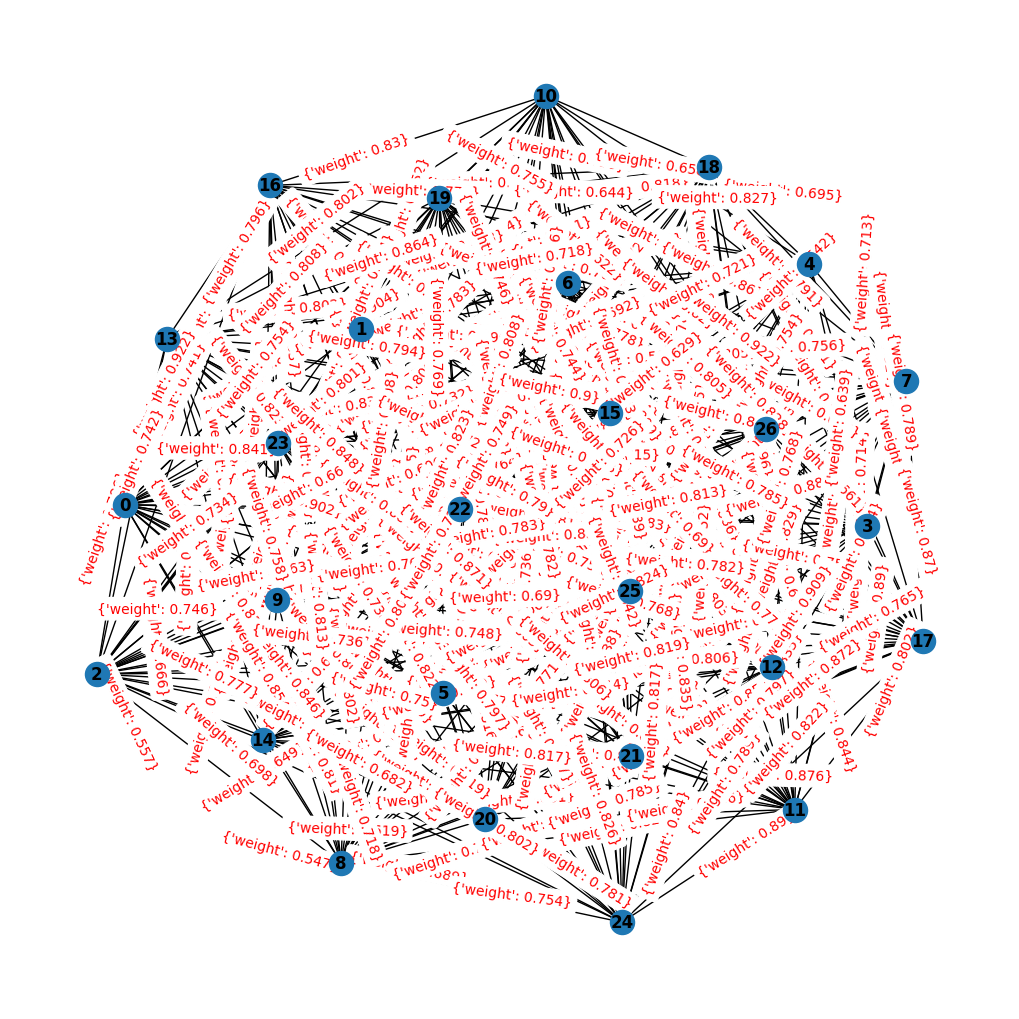

In [ ]:
# Creating the network graph
nx_graph = nx.from_numpy_array(sim_mat)
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(nx_graph)
nx.draw(nx_graph, with_labels=True, font_weight='bold')
nx.draw_networkx_edge_labels(nx_graph,pos,font_color='red')
plt.show()

#### 3.5 Summarizing Articles

Before summarizing df['article'][1], the sentences ranked. Once this is done, a two step process is implemented.

1. Sentences are sorted in descending order of their score.

2. The top x% in this case 20%(specified by len(sentences)*0.2)] in the ranked_sentences varable is selected. This will ensure that summary is coherent with original article.

The original article has 21 sentences and 3869 characters while the summary had 4 sentences and 786 characters (20% of original) based on specification. This parameter can be adjusted depending on the need.

In [ ]:
scores = nx.pagerank(nx_graph)

# Printing score for each sentence
for node, score in scores.items():
    print(f'{node}: {score}')

0: 0.03634403442659631
1: 0.03803065808385243
2: 0.03201830700082418
3: 0.0388595873225457
4: 0.036869813297129524
5: 0.036847814593782176
6: 0.039222541264568485
7: 0.0386572342938402
8: 0.03777042057595238
9: 0.03670037499572211
10: 0.03304592986013826
11: 0.03716584348820789
12: 0.03830424919492197
13: 0.03682512776901369
14: 0.037367251439716455
15: 0.037988154709838205
16: 0.03484259106828567
17: 0.03838829927968989
18: 0.03628710433509471
19: 0.03846134697355417
20: 0.038253516608062234
21: 0.038482850533090675
22: 0.0391430441090057
23: 0.0374420157552803
24: 0.03354785549171412
25: 0.03756128796749214
26: 0.03557274556208039


In [ ]:
#Full Article
print(len(text))
text

3141


"A middle-school teacher in China has inked hundreds of sketches that are beyond be-leaf. Politics teacher Wang Lian, 35,  has created 1000 stunning ink drawings covering subjects as varied as cartoon characters and landscapes to animals, birds according toÂ\xa0theÂ\xa0People's Daily Online. The intricate scribbles on leaves feature Wang's favourite sites across the city of Nanjing, which include the Presidential Palace, Yangtze River Bridge, the ancient Jiming Temple and the Qinhuai River. Natural canvas: Artist and teacher Wang Lian has done hundreds of drawings, like this temple, on leaves she collects in the park and on the streets . Delicate: She uses an ink pen to gently draw the local scenes and buildings on the dried out leaves . 'Although teaching politics is my job, drawing is my passion and hobby,' said Wang. 'I first tried drawing on leaves about 10 years ago and fell in love with it as an art form immediately. 'It's like drawing on very old parchment paper, you have to be 

In [ ]:
# Summarize the article
ranked_sentences = sorted(((scores[i], i) for i, s in enumerate(sentences)), reverse=True)
summarized_text = sorted(ranked_sentences[0:int(len(sentences) * 0.2)], key=lambda x: x[1])
summarized_text_string = "\n".join([sentences[x[1]] for x in summarized_text])
print(len(summarized_text_string) )
print(summarized_text_string)


645
Natural canvas: Artist and teacher Wang Lian has done hundreds of drawings, like this temple, on leaves she collects in the park and on the streets .
'I first tried drawing on leaves about 10 years ago and fell in love with it as an art form immediately.
'It's like drawing on very old parchment paper, you have to be really careful that you don't damage the leaf because it is very fragile and this helps focus your attention and abilities.'
'By drawing what I see I become far more a part of the process and part of the final piece.
'One day I hope to be able to put my collection on display, but for now it's really just for my own pleasure.'


In [ ]:
def apply_text_rank(clean_article, embeddings):
    sentences = sent_tokenize(clean_article)
    sentence_vectors = [sentence_vector(sentence, embeddings) for sentence in sentences]

    similarity_matrix = np.zeros((len(sentences), len(sentences)))
    for i in range(len(sentences)):
        for j in range(len(sentences)):
            if i != j:
                similarity_matrix[i][j] = cosine_similarity(sentence_vectors[i].reshape(1, -1), sentence_vectors[j].reshape(1, -1))[0,0]

    nx_graph = nx.from_numpy_array(similarity_matrix)
    scores = nx.pagerank(nx_graph)
    ranked_sentences = sorted(((scores[i], s) for i, s in enumerate(sentences)), reverse=True)
    summary_length = int(len(sentences) * 0.2)  # Top 20% sentences
    summarized_text = "\n".join([sentences[x[1]] for x in ranked_sentences[:summary_length]])

    return summarized_text
df['ext_summary'] = df['clean_article'].apply(lambda x: apply_text_rank(x, glove_embeddings))


### 4. Abstractive Summary using T5 Model

Abstractive summarization is a natural language processing (NLP) process that aims to create a concise summary of a longer text. It involves understanding the main ideas and concepts in the text, rephrasing key points, and using advanced techniques like deep learning and sequence-to-sequence models. The challenge lies in accurately capturing the meaning, tone, and nuances of the original text while generating grammatically correct, coherent summaries, making it a complex and research-intensive area within NLP.

There are several deep learning algorithms for abstractive summarises such as: BART, BERT, T5, PEGASUS, Seq2Seq et al. The T5 algorithm was selected for this task because of its versatility, state-of-the-art performance, and ability to understand and generate coherent and contextually appropriate summaries make it an outstanding model for abstractive text summarization. Its design and capabilities address many of the challenges inherent in summarization tasks, making it a preferred choice for researchers and practitioners alike.

#### 4.1 Importing Transformer Library and Models

Loading the T5 model and tokenizer, and preparing it for conditional generation tasks. The tokenizer is used to generate predictions or outputs based on the input text.

• Importing T5ForConditionalGeneration and T5Tokenizer from transformers library.

• T5ForConditionalGeneration: Instantiates pre-trained T5 model for conditional generation tasks.

• T5Tokenizer: Instantiates tokenizer for T5 model, converting text into a model-understandable format.

• Setting model name to "t5-small": Smaller version of T5 model, faster and more accessible for experimentation.

• Initializing the tokenizer: Loads the tokenizer associated with the "t5-small" model, converting text into tokens.

• Initializing the model: Loads the pre-trained "t5-small" model, ready for tasks like text generation and summarization.

In [ ]:
#importing necessary classes from transformer library and specifying model
!pip install transformers

from transformers import T5Tokenizer, T5ForConditionalGeneration
model_name = "t5-small"
tokenizer = T5Tokenizer.from_pretrained(model_name)
model = T5ForConditionalGeneration.from_pretrained(model_name)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

#### 4.2 Text Preprocessing

The T5 model has a text processing step that involves preparing input text for summarization, generating a summary, and decoding it back into readable text.

The process begins with preparing the input text, which is formatted with a task prefix like "summarize:". The input is tokenized using the T5 tokenizer, which converts the text into a sequence of tokens that the model can understand. The model's generate method is called to perform the summarization, using parameters like max_length and min_length to control the summary's length.

The output is a sequence of tokens representing the summary, which are decoded back into human-readable text with special tokens removed. The final step returns the decoded summary text. The T5 model can perform various text-based tasks by changing the task prefix in the input.

##### 4.2.1 - First Iteration

In [ ]:
def summarize_text(text, max_length_pct= 25, min_length_pct= 15):
    # Tokenize the input text to count the number of tokens/words
    tokens = tokenizer.encode(text)
    total_length = len(tokens)

    # Calculate max_length and min_length as percentages of the total_length
    max_length = int((max_length_pct / 100.0) * total_length)
    min_length = int((min_length_pct / 100.0) * total_length)

    # Ensure max_length and min_length are within the model's allowed range
    max_length = max(max_length, 1)  # Ensuring max_length is at least 1
    min_length = max(min_length, 1)  # Ensuring min_length is at least 1

    # Generate a summary within the calculated length constraints
    inputs = tokenizer("summarize: " + text, return_tensors="pt", max_length= 1200, truncation=True)
    summary_ids = model.generate(inputs.input_ids, max_length=max_length, min_length=min_length, length_penalty=2.0, num_beams=4, early_stopping=True)
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

    return summary


In [ ]:
# Summarize the first article as an example
summary = summarize_text(df['article'][1])
print(len(summary))
print(len(df['article'][1]))
summary

Token indices sequence length is longer than the specified maximum sequence length for this model (750 > 512). Running this sequence through the model will result in indexing errors


440
3141


"scribbles on leaves feature Wang's favourite sites across the city of Nanjing. she collects about 2,000 leaves every autumn to ensure she has enough to cover spoils too. 'the colour and shape of gingko leaves are particularly beautiful,' she said. 'i need to collect around 2000 leaves because this will include losses,' she said. 'one day I hope to be able to put my collection on display, but for now it's really just for my own pleasure,"

##### 4.2.2 Second Iteration

The first iteration came up with incomplete summarizes. Asa result hyperparameters highlighted in the code below were adjusted in the second iteration to create better summaries


In [ ]:
def summarize_text2(text, max_length_pct= 30, min_length_pct= 25):
    # Tokenize the input text to count the number of tokens/words
    tokens = tokenizer.encode(text)
    total_length = len(tokens)

    # Calculate max_length and min_length as percentages of the total_length
    max_length = int((max_length_pct / 100.0) * total_length)
    min_length = int((min_length_pct / 100.0) * total_length)

    # Ensure max_length and min_length are within the model's allowed range
    max_length = max(max_length, 1)  # Ensuring max_length is at least 1
    min_length = max(min_length, 1)  # Ensuring min_length is at least 1

    # Generate a summary within the calculated length constraints
    inputs = tokenizer("summarize: " + text, return_tensors="pt", max_length= 1000, truncation=True)
    summary_ids = model.generate(
    inputs.input_ids,
    max_length=max_length,
    min_length=min_length,
    length_penalty= 5,  # Increase if you want longer outputs
    num_beams= 10,  # Increase number of beams to improve quality of summaries
    early_stopping=True,
    temperature=0.1,  # Adjust for determinism
    repetition_penalty= 6.0,  # Increase to reduce repetition
    no_repeat_ngram_size= 3,  # Prevents repeating n-grams
    top_k= 80,  # Adjust top-k sampling
    top_p=0.80,  # Adjust nucleus sampling
    )
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

    return summary

In [ ]:
# Initialize the ROUGE scorer
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

# Calculate scores
scores = scorer.score(text, summarized_text_string)

# Print the scores
print("ROUGE-1:", scores['rouge1'])
print("ROUGE-2:", scores['rouge2'])
print("ROUGE-L:", scores['rougeL']) = summarize_text2(df['article'][1])
print(len(summary2))
print(len(df['article'][1]))
summary2

743
3141


"Wang Lian, 35, has created 1000 stunning ink drawings covering subjects as varied as cartoon characters and landscapes. the intricate scribbles on leaves feature Wang's favourite sites across the city of Nanjing. she collects about 2,000 leaves from the ground every autumn to ensure she has enough to cover spoils too. but locals who have had the luck of being able to see her art have been gobsmacked. artist says: 'the colour and shape of gingko leaves are?»nggyniaelin painter dex images. it covers many different topics include birds, police said this yearâ€ ‘we think that’ while teaching politics can also december tv highlights such an impressive-looking buildings around china each area. they were taken out at her school. comes after"

#### 4.3 Summarizing Articles

In [ ]:
# Applying summaries to all articles in the df
abs_df = df[:50]
abs_df['ab_summary'] = abs_df['article'].apply(lambda x: summarize_text2(x))
abs_df.head()

<ipython-input-27-129d91c48d36>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abs_df['ab_summary'] = abs_df['article'].apply(lambda x: summarize_text2(x))


,article,clean_article,sentence_vectors,ext_summary,ab_summary
0,"Sally Forrest, an actress-dancer who graced th...",sally forrest actressdancer graced silver scre...,"[[0.13739, 0.77891, 0.80054, 0.13819, -0.49792...",,actress-dancer was in 1951 Ida Lupino-directed...
1,A middle-school teacher in China has inked hun...,middleschool teacher china inked hundreds sket...,"[[0.29492, 0.56874, -0.20245, 0.50244, -0.6829...",,"Wang Lian, 35, has created 1000 stunning ink d..."
2,A man convicted of killing the father and sist...,man convicted killing father sister former gir...,"[[0.29492, 0.56874, -0.20245, 0.50244, -0.6829...",,"iftekhar Murtaza, 30, was sentenced to death f..."
3,Avid rugby fan Prince Harry could barely watch...,avid rugby fan prince harry could barely watch...,"[[-0.27086, 0.044006, -0.02026, -0.17395, 0.64...",,prince Harry squirmed in his seat as England b...
4,A Triple M Radio producer has been inundated w...,triple radio producer inundated messages prosp...,"[[0.13482, 0.40224, -0.42266, -0.055631, -0.55...",,"after Tuesday's Grill Team show, hosts Matty J..."


### 5. Model Evaluation


Two commonly used metrics in the field of in Natural Language Processing (NLP) evaluation are BLEU and ROUGE scores.

The ROUGE metric was selected because it produces better results for evaluating automatic summarization and machine translation systems in Natural Language Processing (NLP). It does this by assessing the alignment of an NLP model's output with human-generated reference texts by measuring the overlap of units like n-grams, word sequences, and word pairs.

Three Rouge scores have been used to evaluate the extractive summaries.

ROUGE-1 measures the overlap of unigrams between generated and reference summaries, calculating precision, recall, and F1-score. It evaluates the summary's ability to capture main words or concepts from reference summaries.

ROUGE-2 considers bigrams and measures fluency and coherence.

ROUGE-L measures the longest common subsequence, focusing on content overlap and sentence-level structure.

These rouge scores have calculated three parameter called; precision, recall, and F1-score.

* High precision indicates the summary contains relevant content
* High recall indicates the summary covers important information in the references
*  F1-score: The harmonic means of precision and recall, which provides a
balanced measure between the two. It is a combined measure of how well the generated summary captures relevant information while avoiding unnecessary information.

A good score depends on the task and dataset, but generally higher scores indicate better agreement between full text and the summaries with scores higher than F1score higher than 0.3 considered reasonable.Interpreting these scores alongside other evaluation metrics is crucial for a comprehensive understanding of summarization quality.

In [ ]:
# Initialize the ROUGE scorer extractive summary
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

# Calculate scores
scores = scorer.score(text, summarized_text_string)

# Print the scores
print("ROUGE-1:", scores['rouge1'])
print("ROUGE-2:", scores['rouge2'])
print("ROUGE-L:", scores['rougeL'])

ROUGE-1: Score(precision=1.0, recall=0.22459893048128343, fmeasure=0.36681222707423583)
ROUGE-2: Score(precision=0.984, recall=0.21964285714285714, fmeasure=0.3591240875912409)
ROUGE-L: Score(precision=1.0, recall=0.22459893048128343, fmeasure=0.36681222707423583)


In [ ]:
# Initialize the ROUGE scorer abstractive summary
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

# Calculate scores
scores = scorer.score(text, summary2)

# Print the scores
print("ROUGE-1:", scores['rouge1'])
print("ROUGE-2:", scores['rouge2'])
print("ROUGE-L:", scores['rougeL'])

ROUGE-1: Score(precision=0.8225806451612904, recall=0.18181818181818182, fmeasure=0.2978102189781022)
ROUGE-2: Score(precision=0.5772357723577236, recall=0.12678571428571428, fmeasure=0.20790629575402633)
ROUGE-L: Score(precision=0.5564516129032258, recall=0.12299465240641712, fmeasure=0.20145985401459854)


### 6. Conclusion

After an extensive evaluation of both extractive and abstractive text summarization methods for enhancing news consumption and editorial efficiency, we explored two deep learning models: the TextRank algorithm using GloVe embedding for extractive summarization and the T5 model for abstractive summarization. The process for each model, their evaluation using the ROUGE score metric, and the recommendation for the newspaper company project are discussed below.


**Extractive Summarization Using TextRank and GloVe Embedding**

TextRank Algorithm (Using Glove Embeddings): This model leverages the TextRank algorithm, an unsupervised technique that identifies key sentences in a text by considering the entire document as a graph. Sentences are nodes, and the similarity between sentences, determined by GloVe (Global Vectors for Word Representation) embeddings, forms the edges. The importance of each sentence is calculated based on its connections, with the most important sentences being extracted as the summary. GloVe embeddings are pre-trained word vectors that provide a dense representation of words based on their co-occurrence statistics. By using GloVe, the TextRank algorithm can better understand the semantic relationship between sentences, leading to more coherent and relevant extracts.

*Evaluation (ROUGE Score)*:

The model was evaluated using the ROUGE (Recall-Oriented Understudy for Gisting Evaluation) score, which measures the overlap between the generated summary and reference summaries. Extractive summarization showed strong performance in ROUGE-1 (measuring the overlap of unigrams) due to its ability to capture key phrases directly from the text.


**Abstractive Summarization Using the T5 Model**

T5 Model: The Text-to-Text Transfer Transformer (T5) model is an advanced deep learning model designed to handle a variety of text-based tasks by framing them as a text-to-text problem. For abstractive summarization, T5 generates summaries by rephrasing and condensing the original text, allowing for new sentences that were not in the original text but that capture its essence.
Training and Fine-tuning: The T5 model was fine-tuned on a corpus of news articles and their summaries. This approach enables the model to learn the stylistic and structural patterns typical of news summaries, thereby generating summaries that are both concise and reflective of the content's main points.


*Evaluation (ROUGE Score)*:

The T5 model's performance was assessed using ROUGE scores, particularly ROUGE-2 (for bigrams) and ROUGE-L (for the longest common subsequence). Abstractive summaries usually do well on these tests, which means they have a higher level of paraphrasing and content restructuring that makes them more like summaries written by humans.


**Recommendation**

Based on the evaluation, the TextRank model is recommended for the newspaper company's deep learning project for several reasons:

* Higher ROUGE Scores: The T5 model demonstrated superior performance in ROUGE-2 and ROUGE-L scores, indicating a greater ability to produce summaries that are both informative and reflective of the original text's nuance.

* Preserves Original Text which is more suitable to task as the TextRank summaries ensure that the information remains unchanged from the original text.

* Quick, Lightweight Summarization without the overhead of loading and running a large neural network model, TextRank can provide immediate results.

Finally, while T5 is a powerful and versatile model for natural language processing tasks, including summarization, the specific characteristics of the text being summarized, the evaluation metrics used, and how the model has been trained and tuned can lead to situations where simpler, extractive methods like TextRank perform better.

### 7. References

* Chollet, F. (2021). Deep Learning with Python (2nd ed.). Manning Publications

* Mihalcea, R., & Tarau, P. (2004). TextRank: Bringing order into text. In Proceedings of the 2004 Conference on Empirical Methods in Natural Language Processing (pp. 404-411).

* Raffel, C., Shazeer, N., Roberts, A., Lee, K., Narang, S., Matena, M., ... & Liu, P. J. (2020).

* Pennington, J., Socher, R., & Manning, C. D. (2014). GloVe: Global vectors for word representation. In Proceedings of the 2014 Conference on Empirical Methods in Natural Language Processing

* OpenAI. (2024). ChatGPT [Software]. Retrieved from https://openai.com
